In [60]:
# Importacion de librerias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import (confusion_matrix, classification_report,
                           roc_curve, roc_auc_score, precision_score,
                           accuracy_score, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
Seed = 42
np.random.seed(Seed)

# Carga de los datos
cancer = load_breast_cancer()
columnas= [
    'radio_medio', 'textura_media', 'perimetro_medio', 'area_media',
    'suavidad_media', 'compacidad_media', 'concavidad_media', 'puntos_concavos_medios',
    'simetria_media', 'dimension_fractal_media',
    'error_radio', 'error_textura', 'error_perimetro', 'error_area',
    'error_suavidad', 'error_compacidad', 'error_concavidad', 'error_puntos_concavos',
    'error_simetria', 'error_dimension_fractal',
    'peor_radio', 'peor_textura', 'peor_perimetro', 'peor_area',
    'peor_suavidad', 'peor_compacidad', 'peor_concavidad', 'peor_puntos_concavos',
    'peor_simetria', 'peor_dimension_fractal'
]

df = pd.DataFrame(cancer.data, columns=columnas)
df['diagnostico'] = cancer.target
print(df.head())

# En diagnostico -> 1: Cancer ; 0: No Cancer

   radio_medio  textura_media  perimetro_medio  area_media  suavidad_media  \
0        17.99          10.38           122.80      1001.0         0.11840   
1        20.57          17.77           132.90      1326.0         0.08474   
2        19.69          21.25           130.00      1203.0         0.10960   
3        11.42          20.38            77.58       386.1         0.14250   
4        20.29          14.34           135.10      1297.0         0.10030   

   compacidad_media  concavidad_media  puntos_concavos_medios  simetria_media  \
0           0.27760            0.3001                 0.14710          0.2419   
1           0.07864            0.0869                 0.07017          0.1812   
2           0.15990            0.1974                 0.12790          0.2069   
3           0.28390            0.2414                 0.10520          0.2597   
4           0.13280            0.1980                 0.10430          0.1809   

   dimension_fractal_media  ...  peor_textur

In [62]:
# Verificacion de la existencia de valores nulos dentro del conjunto de datos
print("Dimensiones de dataset:", df.shape)

null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

print("\nValores nulos por columna:")
print(null_counts.to_string())


Dimensiones de dataset: (569, 31)

Valores nulos por columna:
radio_medio                0
textura_media              0
perimetro_medio            0
area_media                 0
suavidad_media             0
compacidad_media           0
concavidad_media           0
puntos_concavos_medios     0
simetria_media             0
dimension_fractal_media    0
error_radio                0
error_textura              0
error_perimetro            0
error_area                 0
error_suavidad             0
error_compacidad           0
error_concavidad           0
error_puntos_concavos      0
error_simetria             0
error_dimension_fractal    0
peor_radio                 0
peor_textura               0
peor_perimetro             0
peor_area                  0
peor_suavidad              0
peor_compacidad            0
peor_concavidad            0
peor_puntos_concavos       0
peor_simetria              0
peor_dimension_fractal     0
diagnostico                0


No se encontraron valores nulos por lo que no se realizo la imputacion de datos.

In [63]:
print("Distrivucion de la variable objetivo")
print(df['diagnostico'].value_counts())
print(f"Proporcion de clases {df['diagnostico'].value_counts(normalize=True)}")

Distrivucion de la variable objetivo
diagnostico
1    357
0    212
Name: count, dtype: int64
Proporcion de clases diagnostico
1    0.627417
0    0.372583
Name: proportion, dtype: float64


Se determino que es un conjunto de datos desbalanceado.

Dimensiones de X: (569, 30)
Dimensiones de variable objetivo y: (569,)


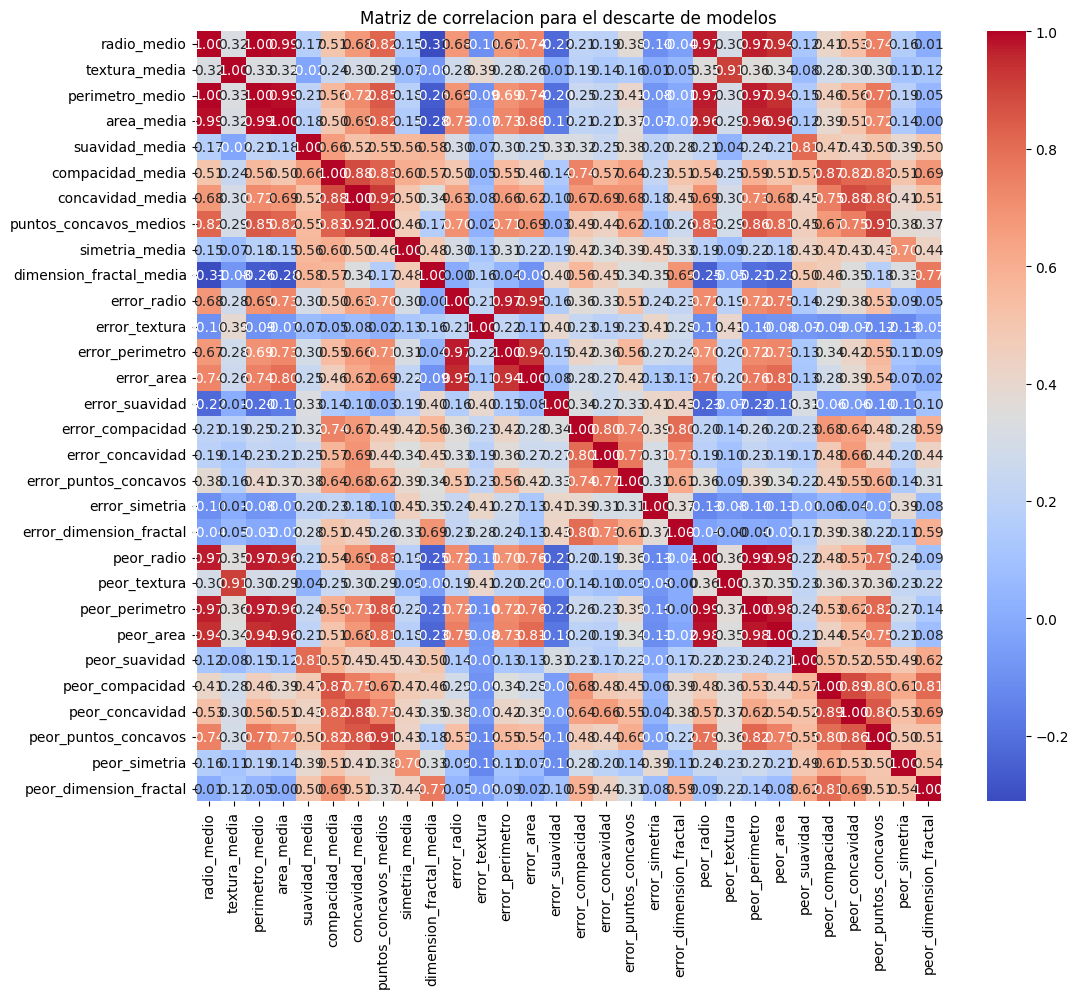

In [56]:
x = df.drop('diagnostico', axis=1)
y = df['diagnostico']

print(f"Dimensiones de X: {x.shape}")
print(f"Dimensiones de variable objetivo y: {y.shape}")

plt.figure(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion para el descarte de modelos')
plt.show()

In [57]:
# Division del conjunto de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=Seed)

print(f"Dimensiones de X_train: {x_train.shape[0]} muestra, ({x_train.shape[0]/len(x)*100:.1f}%)")
print(f"Dimensiones de X_test: {x_test.shape[0]} muestra, ({x_test.shape[0]/len(x)*100:.1f}%)")
print("")

# Escalamiento de los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Evaluacion del mdejor modelo
def evaluar_modelo(modelo, x_tr, x_ts, y_ts):
    modelo.fit(x_tr, y_train)
    pred = modelo.predict(x_ts)
    accuracy = accuracy_score(y_ts, pred)
    return accuracy

resultados = {}

nb_model = GaussianNB()
resultados['Naive Bayes'] = evaluar_modelo(nb_model, x_train_scaled, x_test_scaled, y_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
resultados['KNN'] = evaluar_modelo(knn_model, x_train_scaled, x_test_scaled, y_test)

log_model = LogisticRegression(solver='liblinear', random_state=Seed)
resultados['Regresion logistica'] = evaluar_modelo(log_model, x_train_scaled, x_test_scaled, y_test)

tree_model = DecisionTreeClassifier(random_state=Seed)
resultados['Arbol de decision'] = evaluar_modelo(tree_model, x_train_scaled, x_test_scaled, y_test)

df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo',  'Precision'])
df_resultados = df_resultados.sort_values(by='Precision', ascending=False)
print(df_resultados)

Dimensiones de X_train: 398 muestra, (69.9%)
Dimensiones de X_test: 171 muestra, (30.1%)

                Modelo  Precision
2  Regresion logistica   0.982456
1                  KNN   0.959064
3    Arbol de decision   0.941520
0          Naive Bayes   0.935673


El modelo que obtuvo un mejor rendimiento fue el de la regresion logistica, aunque los demas modelos igual presentaron rendimientos cercanos a 1.

In [58]:
# Predicion y evaluacion

log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)
y_proba = log_model.predict_proba(x_test_scaled)[:, 1]

print("[[VN FP]] - Verdaderos Negativos | Falsos Positivos")
print(f"[[FP VP]] - Falsos negativos | Verdaderos positivos")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Reporte de clasificacion")
print(classification_report(y_test, y_pred, target_names=['Sano', 'Enfermo']))

auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")


[[VN FP]] - Verdaderos Negativos | Falsos Positivos
[[FP VP]] - Falsos negativos | Verdaderos positivos
[[ 62   1]
 [  2 106]]
Reporte de clasificacion
              precision    recall  f1-score   support

        Sano       0.97      0.98      0.98        63
     Enfermo       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC: 0.9979


El rendimiento del modelo entrenado fue excelente obteniendo valores muy cercanos a 1.

/tmp/ipython-input-1573562914.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[1, 0], palette='viridis')
/tmp/ipython-input-1573562914.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_coefficient', y='feature', data=coefficients, ax=axes[1, 1], palette='viridis')


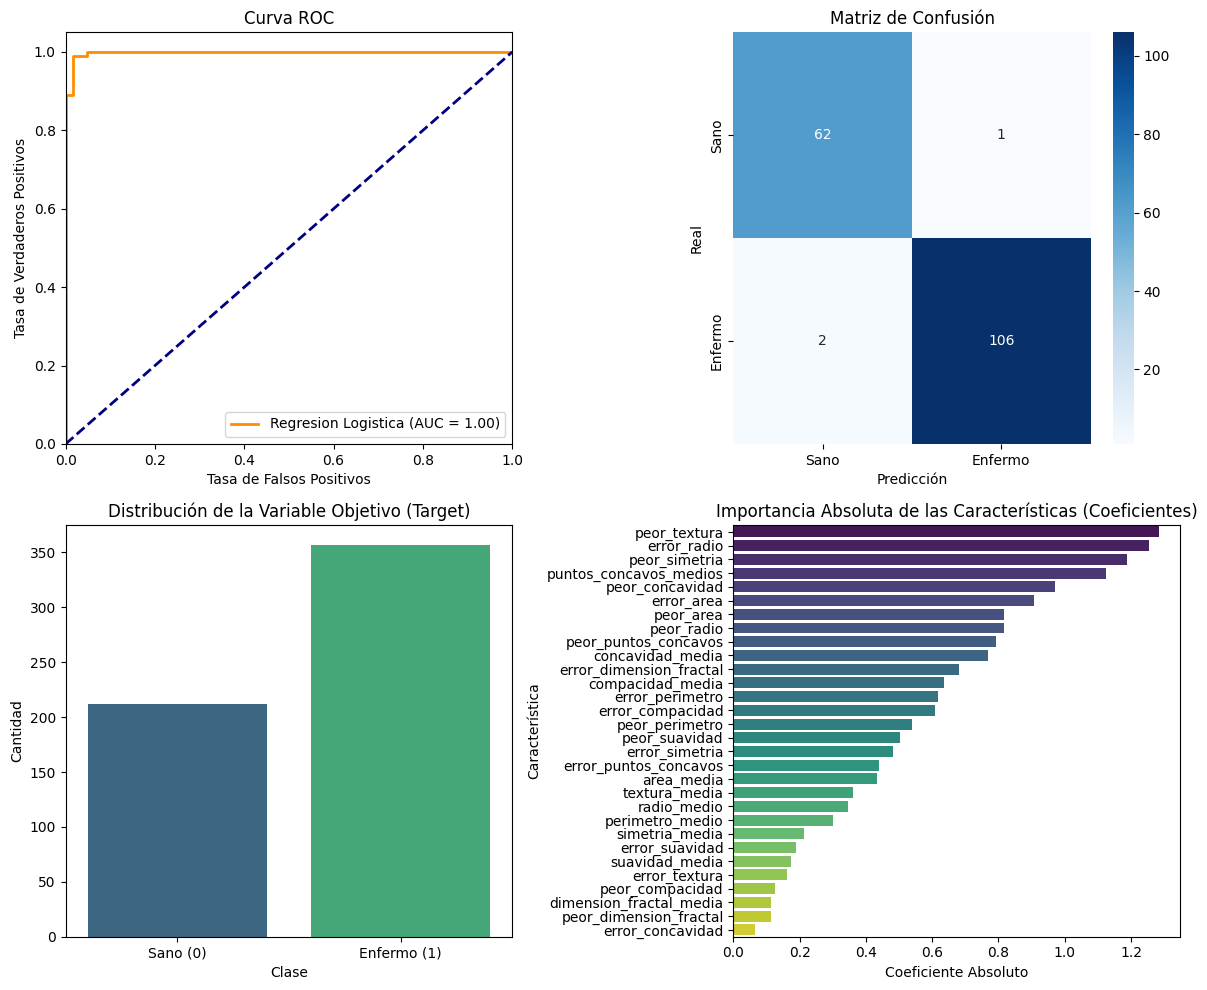

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Regresion Logistica (AUC = {auc:.2f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.05])
axes[0, 0].set_xlabel('Tasa de Falsos Positivos')
axes[0, 0].set_ylabel('Tasa de Verdaderos Positivos')
axes[0, 0].set_title('Curva ROC')
axes[0, 0].legend(loc="lower right")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Sano', 'Enfermo'], yticklabels=['Sano', 'Enfermo'])
axes[0, 1].set_title('Matriz de Confusión')
axes[0, 1].set_xlabel('Predicción')
axes[0, 1].set_ylabel('Real')

sns.countplot(x=y, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribución de la Variable Objetivo (Target)')
axes[1, 0].set_xlabel('Clase')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Sano (0)', 'Enfermo (1)'])

coefficients = pd.DataFrame({'feature': x.columns, 'coefficient': log_model.coef_[0]})
coefficients['abs_coefficient'] = np.abs(coefficients['coefficient'])
coefficients = coefficients.sort_values('abs_coefficient', ascending=False)

sns.barplot(x='abs_coefficient', y='feature', data=coefficients, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Importancia Absoluta de las Características (Coeficientes)')
axes[1, 1].set_xlabel('Coeficiente Absoluto')
axes[1, 1].set_ylabel('Característica')


plt.tight_layout()
plt.show()

La importancia de cada grafico es:
1. Curva AOC: Indica el desempeño del modelo cuando se realiza la comparacion de los valores y_test con los y_pred
2. Matriz de correlacion: este nos muestra el resultado de la evaluacion del modelo cuando realizo las predicciones obtuviendo un rendimiento excepcional con unos errores menos preciables.
3. Muestra el desbalance entre los valores de la variable objetivo
4. Muestra que caracteristicas tienen un mayor peso o importancia dentro del entrenamiento del modelo, tambien permitiendo conocer cuales no tienen una fuerte relacion con la variable objetivo. Esto va a permitir conocer que variables pueden usarse para el entrenamiento del modelo y cuales pueden descartarse.